In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bk = pd.read_csv('data/banking.csv')

In [3]:
bk.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
bk.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
bk.shape

(41188, 21)

In [6]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

- There are 21 features including the target feature 'y' and 41188 records
- There are 10 numeric features and 11 categoical features
- There are no null values in the entire dataset

### Learning the features
- Learning the unique values of the features
- Visualizing by bar-plots and histograms

Setting the style and size of the figures

In [7]:
plt.style.use('seaborn')
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [8]:
bk.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

#### Job types

In [9]:
bk.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

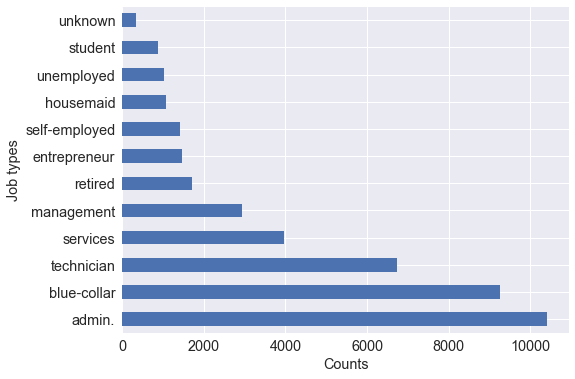

In [10]:
bk.job.value_counts().plot.barh()
plt.xlabel('Counts')
plt.ylabel('Job types')
plt.show()

- The average frequency of the different job types is 3,432
- The most frequent proffessions are admin and blue-collar with 10,422 and 9,254 counts respectively
- The most rare proffessions are unknown and student with 330 and 875 counts respectively

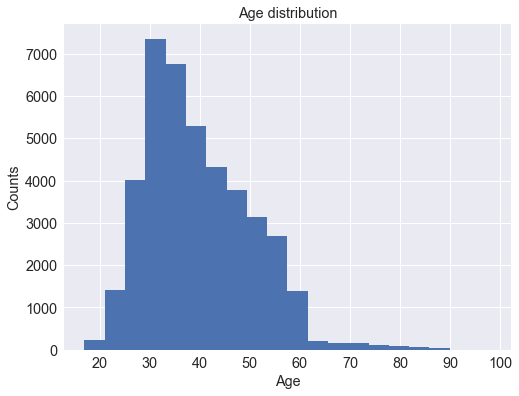

In [34]:
bk.age.plot.hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age distribution')
plt.show()

In [35]:
print("The average age is: ", round(bk.age.mean(), 1))
print("The median age is:  ", bk.age.median())

The average age is:  40.0
The median age is:   38.0


In [36]:
len(bk[(bk.age > 25) & (bk.age < 55)]) / len(bk)

0.856851510148587

- The average age of the participants was 40, and the nedian is 38
- Around 86% of the participants' age are in the range of 25-55 

#### Marital status

In [37]:
bk.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

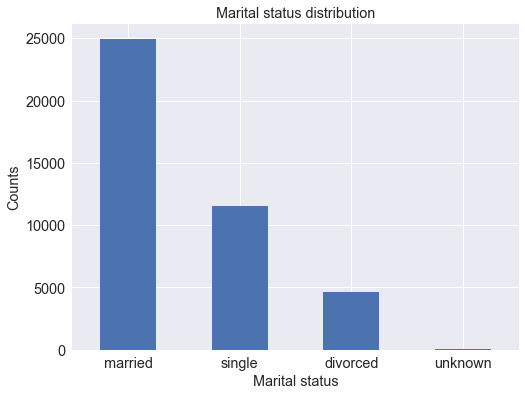

In [38]:
bk.marital.value_counts().plot.bar(rot=0);
plt.xlabel('Marital status')
plt.ylabel('Counts')
plt.title('Marital status distribution')
plt.show()

In [39]:
len(bk[bk.marital == 'married']) / len(bk)

0.6052248227639119

- The 'married' category constitutes almost 61% of the samples which is greater than all the other categories together

#### Education level

In [40]:
bk.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

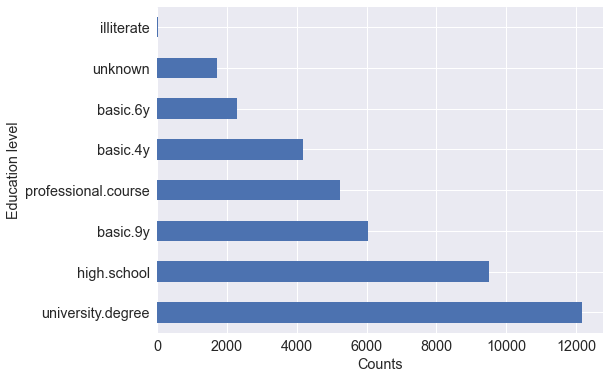

In [41]:
bk.education.value_counts().plot.barh()
plt.xlabel('Counts')
plt.ylabel('Education level')
plt.show()

In [42]:
bk[bk.education == 'university.degree']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
10,34,housemaid,single,university.degree,no,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0
11,41,management,married,university.degree,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
12,55,management,married,university.degree,no,no,no,cellular,aug,mon,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41170,32,technician,single,university.degree,no,yes,yes,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
41174,49,entrepreneur,married,university.degree,no,no,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,0
41177,52,self-employed,single,university.degree,unknown,yes,no,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0
41181,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0


In [43]:
bk.education.value_counts()[:2].sum()/len(bk)

0.5264397397300185

- The most frequent subcategory is university degree with 12168 counts
- The most rare subcategory is illiterate with only 18 counts
- Around 53% of the participants have finished high school or university degree 

In [44]:
corr = bk.corr()

In [45]:
corr.style.background_gradient(cmap='coolwarm')

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


- Using the correlation matrix we can find highly correlated features
- Those features can be later used to build the model and analyze the results

Are the classes balanced?

In [46]:
bk.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

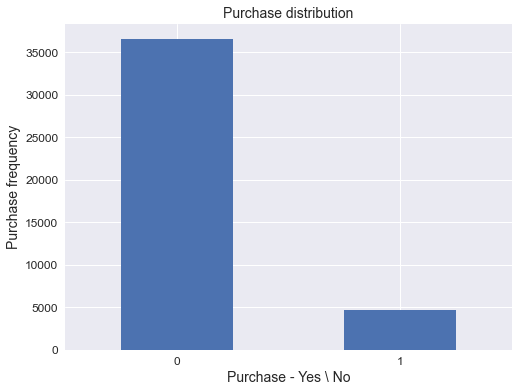

In [47]:
bk.y.value_counts().plot.bar(rot=0, fontsize=12)
plt.xlabel('Purchase - Yes \ No', fontsize=14)
plt.ylabel('Purchase frequency', fontsize=14)
plt.title('Purchase distribution', fontsize=14)
plt.show()

In [48]:
class_0 = bk.y.value_counts()[0]
class_1 = bk.y.value_counts()[1]
print("The precentage of class '0' is: ", round(100*class_0/(class_0 + class_1), 2))
print("The precentage of class '1' is: ", round(100*class_1/(class_0 + class_1), 2))

The precentage of class '0' is:  88.73
The precentage of class '1' is:  11.27


- The classes are not balanced. There's almost a factor of 8 between 'yes' and 'no' classes ('yes' being the minority class)

In [49]:
round(bk.groupby('y').mean(), 1)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.9,220.8,2.6,984.1,0.1,0.2,93.6,-40.6,3.8,5176.2
1,40.9,553.2,2.1,792.0,0.5,-1.2,93.4,-39.8,2.1,5095.1


- The different features were grouped by the target feature
- Age, duration, and campaign seem to be nicely separated by the target feature

In [50]:
import seaborn as sns

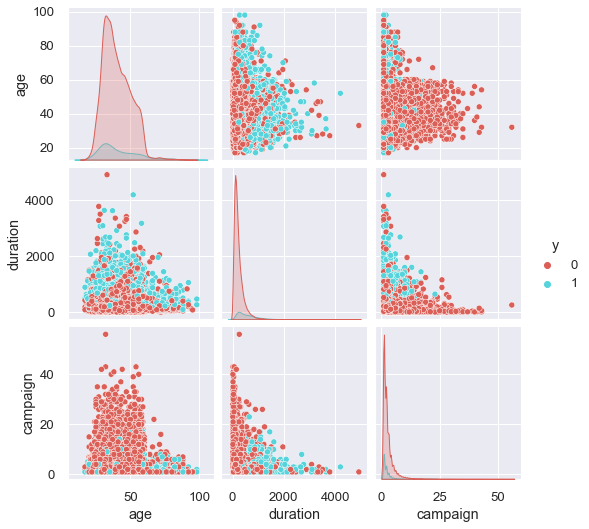

In [51]:
sns.set(font_scale=1.2)
sns.pairplot(bk[ ['age', 'duration', 'campaign', 'y'] ], hue='y', palette='hls');

- As the campaign gets smaller and the duration gets bigger the participants will tend to purchase the deposit
- For the age feature it seems like a normal distribution (as we have seen earlier)

In [52]:
round(bk.groupby('education').mean(), 2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.60,264.83,2.60,965.70,0.15,0.22,93.66,-40.24,3.75,5170.12,0.10
basic.6y,40.45,264.41,2.56,980.37,0.13,0.23,93.65,-41.13,3.77,5174.72,0.08
basic.9y,39.06,261.29,2.53,979.13,0.14,0.16,93.62,-41.33,3.70,5172.29,0.08
high.school,38.00,260.89,2.57,964.36,0.19,0.03,93.58,-40.94,3.56,5164.99,0.11
illiterate,48.50,276.78,2.28,943.83,0.11,-0.13,93.32,-39.95,3.52,5171.78,0.22
professional.course,40.08,252.53,2.59,960.77,0.16,0.17,93.57,-40.12,3.71,5170.16,0.11
university.degree,38.88,253.22,2.56,951.81,0.19,-0.03,93.49,-39.98,3.53,5163.23,0.14
unknown,43.48,262.39,2.60,942.83,0.23,0.06,93.66,-39.88,3.57,5159.55,0.15


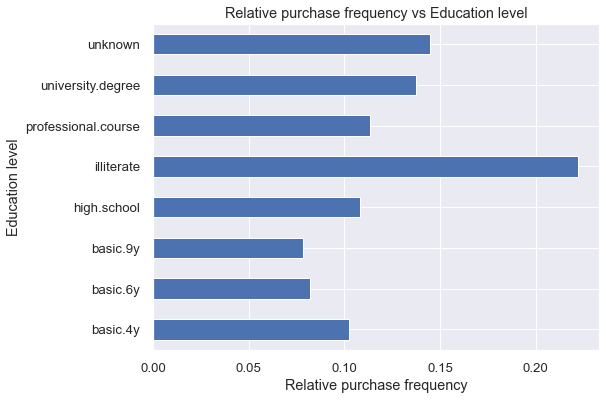

In [53]:
bk.groupby('education').mean().y.plot.barh(rot=0);
plt.title('Relative purchase frequency vs Education level')
plt.xlabel('Relative purchase frequency')
plt.ylabel('Education level')
plt.show()

### Misleading visualization
- It seems like the illiterate subcategory is the most dominant one
- But we should not forget that this category includes only 18 samples!
- We can fix it using the following plot - 

In [54]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

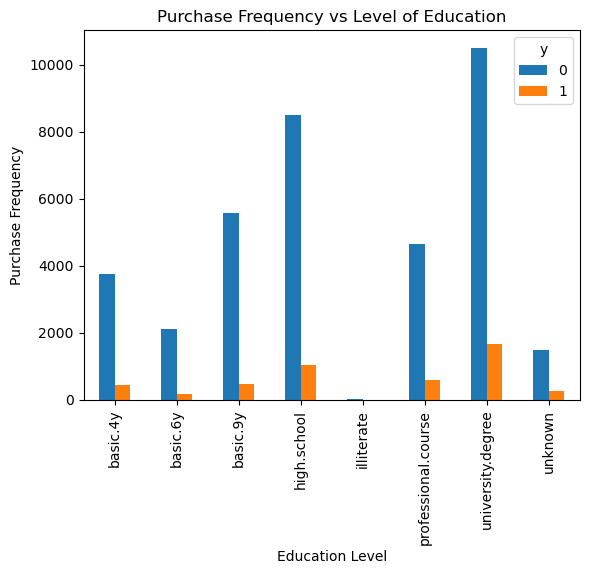

In [55]:
table = pd.crosstab(bk.education, bk.y).plot(kind='bar')
plt.title('Purchase Frequency vs Level of Education')
plt.xlabel('Education Level')
plt.ylabel('Purchase Frequency')
plt.show()

- From this plot it's easy to see that the illiterate subcategory is negilgble
- The majority of the participants that did purchase had at high school diploma or university degree
- We also need to take into consideration that high school and university degree are the biggest subcategories

In [56]:
round(bk.groupby('job').mean(), 2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.19,254.31,2.62,954.32,0.19,0.02,93.53,-40.25,3.55,5164.13,0.13
blue-collar,39.56,264.54,2.56,985.16,0.12,0.25,93.66,-41.38,3.77,5175.62,0.07
entrepreneur,41.72,263.27,2.54,981.27,0.14,0.16,93.61,-41.28,3.79,5176.31,0.09
housemaid,45.50,250.45,2.64,960.58,0.14,0.43,93.68,-39.50,4.01,5179.53,0.10
management,42.36,257.06,2.48,962.65,0.19,-0.01,93.52,-40.49,3.61,5166.65,0.11
retired,62.03,273.71,2.48,897.94,0.33,-0.70,93.43,-38.57,2.77,5122.26,0.25
self-employed,39.95,264.14,2.66,976.62,0.14,0.09,93.56,-40.49,3.69,5170.67,0.10
services,37.93,258.40,2.59,979.97,0.15,0.18,93.63,-41.29,3.70,5171.60,0.08
student,25.89,283.68,2.10,840.22,0.52,-1.41,93.33,-40.19,1.88,5085.94,0.31


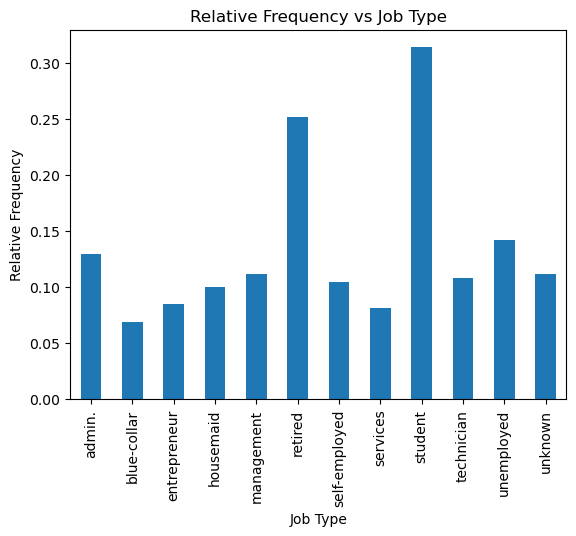

In [57]:
bk.groupby('job').mean().y.plot.bar(ylabel='Relative Frequency', xlabel='Job Type',
                                    title='Relative Frequency vs Job Type');

Text(0, 0.5, 'Frequency of Purchase')

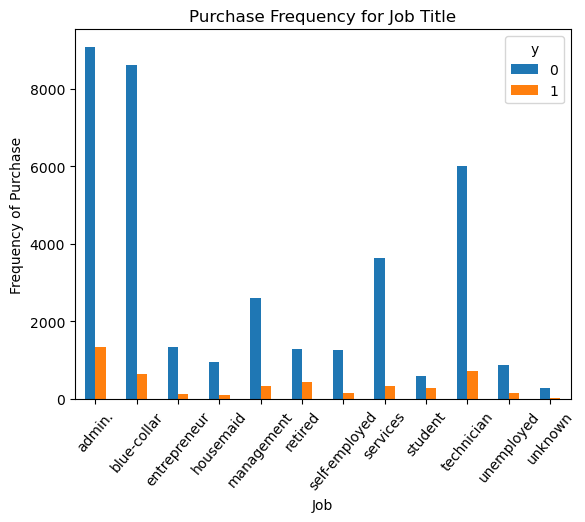

In [59]:
pd.crosstab(bk.job, bk.y).plot(kind='bar', rot=50)
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

- Students have the highest relative frequency to purchase the deposit (relatively small group)
- Blue-collar have the lowest relative frequency to purchase deposit, but they are relatively large group
- The absolute number of purchases of blue-collar and admin are the highest

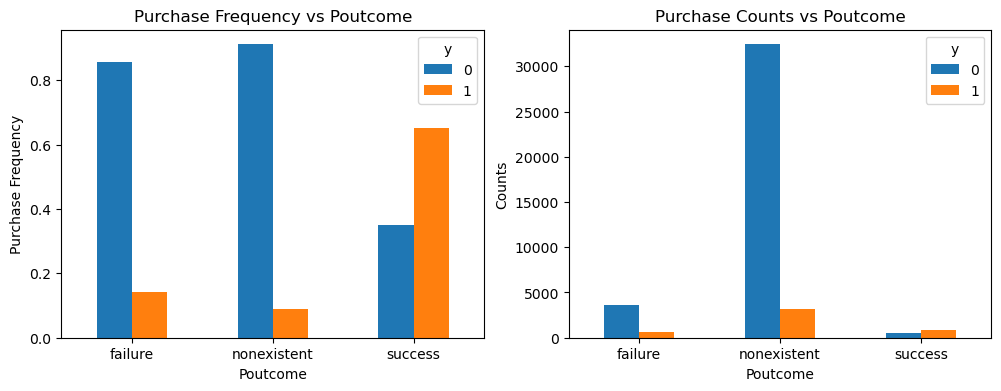

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2)
table = pd.crosstab(bk.poutcome, bk.y)
tabel_div = table.div(table.sum(axis=1).astype(float), axis=0)
tabel_div.plot(kind='bar', stacked=False, ax=axes[0], rot=0, xlabel= 'Poutcome', ylabel='Purchase Frequency',
               figsize=(12,4), title='Purchase Frequency vs Poutcome')
table.plot(kind='bar', rot=0, ax=axes[1], figsize=(12,4), xlabel='Poutcome',
           ylabel='Counts', title='Purchase Counts vs Poutcome')
plt.show()

#### From the two plots above we can understand the follows - 
- If the last phone call ended with success (purchase), the odds of havung another purchase is more than 60%
- Though, this is relatively a small group out of the entire dataset
- If there was a failure on the last phone call, people will still tend to purchase more than if a phone call wasen't received

### Dummy Variables

In [11]:
bk_cat = pd.get_dummies(bk, columns=['job','marital','education','default','housing','loan',
                                     'contact','month','day_of_week','poutcome'], drop_first=True)

In [12]:
bk_cat.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

In [13]:
X = bk_cat.loc[:, bk_cat.columns != 'y']
y = bk_cat.loc[:, bk_cat.columns == 'y']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
lgr = LogisticRegression(max_iter=750)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
scores = cross_val_score(lgr, X_train, y_train.values.reshape(-1,), cv=5)
scores

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.9135713 , 0.91012865, 0.91284653, 0.91284653, 0.9112158 ])

In [19]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.00


In [20]:
lgr.fit(X_train, y_train.values.reshape(-1,))

LogisticRegression(max_iter=750)

In [21]:
lgr.score(X_train, y_train)

0.9120492842906324

In [22]:
lgr.score(X_test, y_test)

0.9072316633561391

- Cross validation doesn't contribute much in this case

In [77]:
from sklearn.metrics import confusion_matrix

In [24]:
pred = lgr.predict(X_test)

In [25]:
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[11670   364]
 [  897   662]]


In [264]:
from sklearn.ensemble import RandomForestClassifier

In [265]:
rf = RandomForestClassifier(max_depth=25, random_state=42)

In [266]:
rf.fit(X_train, y_train.values.reshape(-1,))

RandomForestClassifier(max_depth=25, random_state=42)

In [267]:
rf.score(X_train, y_train)

0.9996376155100561

In [268]:
rf.score(X_test, y_test)

0.9142941219745457

### Dealing with the Unbalanced classes
### SMOTE - Synthetic Minority Oversampling Technique
SMOTE algorithm enables to level-up the number of samples for different classes on a classification problem. When a dataset is given on a classification problem, the ideal thing is that the number of samples on each class will be equal. Of course that this is never the case in real use-cases, and the question is what is the unbalance ratio. If the minority class samples are between 20-40% so in most of the cases no intervention should executed. But when the minority class samples contitutes only a small portion of the dataset, say less than 10%, it can damage the performance of the model. Using the SMOTE algorithm we can generate synthetic samples of the minority class, and level-up the classes. The general idea of generating the new samples is to interpolate them from straight lines conacting between the original samples, as can be seen in the figure below. 

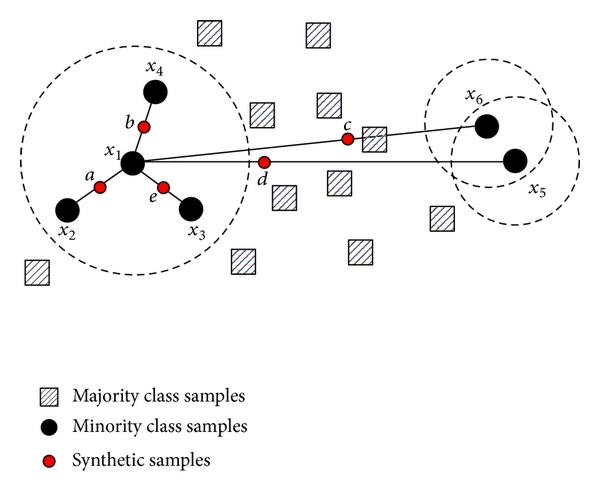

In [44]:
from IPython.display import Image
Image(filename='data/SMOTE.jpg',width=500)

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
sm = SMOTE(random_state=42)

In [47]:
X = bk_cat.loc[:, bk_cat.columns != 'y']
y = bk_cat.loc[:, bk_cat.columns == 'y']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
X_sm, y_sm = sm.fit_sample(X_train, y_train)

In [50]:
y_sm.value_counts()

y
1    24514
0    24514
dtype: int64

- We "smote" only the train set since we don't want to mix between train and test samples
- There's no reason to try and predict "artificial" samples made by smote
- Now the calsses are balanced, we're ready to go!

In [51]:
lgr.fit(X_sm, y_sm)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=750)

In [52]:
lgr.score(X_sm, y_sm)

0.9344660194174758

In [53]:
lgr.score(X_test, y_test)

0.8863385566100198

In [33]:
pred = lgr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[11169   865]
 [  680   879]]


In [281]:
rf.fit(X_sm, y_sm.values.reshape(-1,))

RandomForestClassifier(max_depth=25, random_state=42)

In [282]:
rf.score(X_sm, y_sm)

0.999673655870115

In [283]:
rf.score(X_test, y_test)

0.905907452365188

### Summary
- From the early exploration we learned that the classes within different features such as Job, Education, and Martial are not balanced. Some of the classes contain very few samples were others have thousands of samples. That may affect the model in a way that the minority classes may not be learned as good as the majority classes by the model.
- We also saw that the data was unbalnced regarding the target feature with a ration of 1:8. The performance of the model didn't improve after using SMOTE method to correct the unbalanced data.
- The best score on the test was 91.4% (accuracy) using Random Forest model. The train score was 99.9%, pretty big overfitting of the model.
- With the Logistic Regression the results were pretty similar with scores of 90.7% on the test set and 91.2% on the train set.

### Conclusions
- Using this information only I would probably chose the Logistic Regression model.
- It is faster, it has less overfitting, and its perforamnce is almost the same Random Forest.